In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np
import matplotlib.pyplot as plt
import scipy

# suppose 8 categories
true_labels = np.random.randint(0, 8, 100)
predicted_labels = np.random.randint(0, 8, 100)

# precision = precision_score(true_labels, predicted_labels, average='weighted')
# recall = recall_score(true_labels, predicted_labels, average='micro')
# accuracy = accuracy_score(true_labels, predicted_labels, normalize=True)

precision, recall, fscore, support = score(true_labels, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Fscore: {fscore}')

#calculate precision, recall, and accuracy

Precision: [0.11111111 0.15384615 0.0625     0.14285714 0.33333333 0.
 0.         0.16666667]
Recall: [0.07142857 0.18181818 0.11111111 0.16666667 0.2        0.
 0.         0.18181818]
Fscore: [0.08695652 0.16666667 0.08       0.15384615 0.25       0.
 0.         0.17391304]


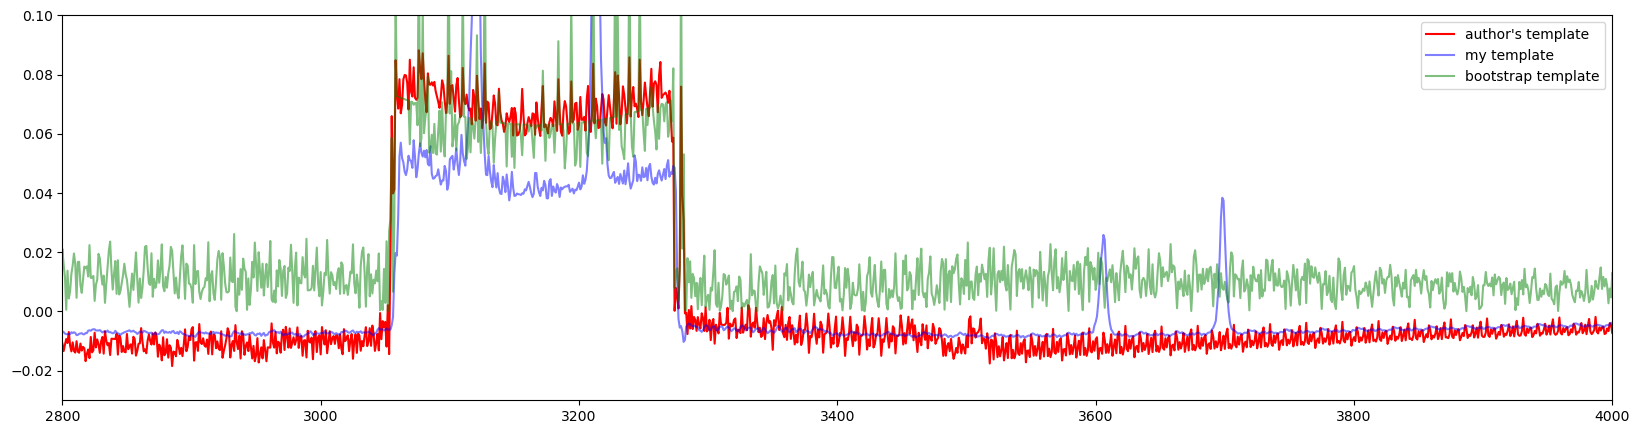

In [45]:
import scipy.signal

trace = np.load('templates/aes.npy', allow_pickle=True)
template = np.load('arch/nodemcu-aes-56000000.npy', allow_pickle=True)
boot_tamplate = np.load('archboot/nodemcu-aes-56000000-boot.npy', allow_pickle=True)
ax = plt.gca()
# b, a = scipy.signal.butter(1, 0.999, btype='low', fs=None)
# trace = scipy.signal.filtfilt(b, a, trace)
ax.set_ylim([-0.03, 0.1])
ax.plot(template, color='red', label = 'author\'s template')
ax.plot(trace, alpha=0.5, color='blue', label = 'my template')
b, a = scipy.signal.butter(1, 0.001, btype='high', fs=None)
boot_tamplate = scipy.signal.filtfilt(b, a, boot_tamplate)
boot_tamplate = np.abs(boot_tamplate)
boot_tamplate = scipy.signal.filtfilt(b, a, boot_tamplate)
ax.plot(np.abs(boot_tamplate), color='green', label = 'bootstrap template', alpha=0.5)
ax.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(20, 5)

ax.set_xlim([2800, 4000])

# plt 
# plt.figure(figsize=(10, 5))
# plt.plot(trace)
plt.show()